![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

# Basic curve fitting as predictive regression

A simple approach to predictive modeling is to fit data against a polynomial. In the simplest case, an order one polynomial is called "linear regression."

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)



Let us start out by importing a variety of capabilities we will use, largely from scikit-learn.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Let us look at some data for housing in King County, Washington (USA).

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


For an illustration of polynomials, let us determine what single feature corresponds most strongly with price.

In [3]:
df.corr().loc['price'].abs().sort_values(ascending=False).head(8)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
Name: price, dtype: float64

This is a nice starting point for an example.

In [4]:
sqft = df.loc[:,['sqft_living', 'price']].sort_values('sqft_living')
sqft

,sqft_living,price
19452,290,142000.0
15381,370,276000.0
860,380,245000.0
18379,384,265000.0
4868,390,228000.0
...,...,...
8092,9640,4668000.0
9254,9890,6885000.0
3914,10040,7062500.0
7252,12050,7700000.0


## Plotting a feature

We can plot the relationship between the "top feature" and the target.  

Note that we could do this just in Pandas, but we want to add more in a moment, which reaches Pandas limits.  E.g. `top_feature.set_index('sqft_living').plot()`

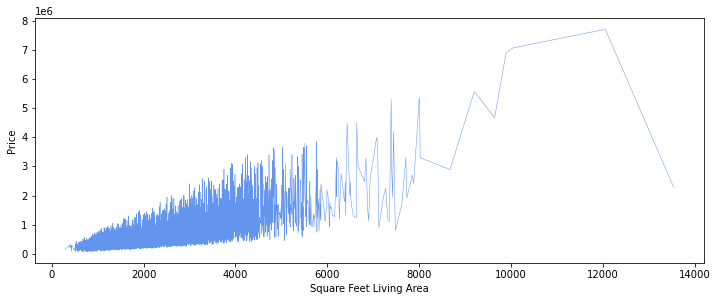

In [10]:
fig, ax = plt.subplots(figsize=(12,4.5))
ax.plot(sqft.sqft_living, sqft.price, 
        color='cornflowerblue', linewidth=0.5)
ax.set_xlabel("Square Feet Living Area")
ax.set_ylabel("Price");

Let us consider some polynomials.

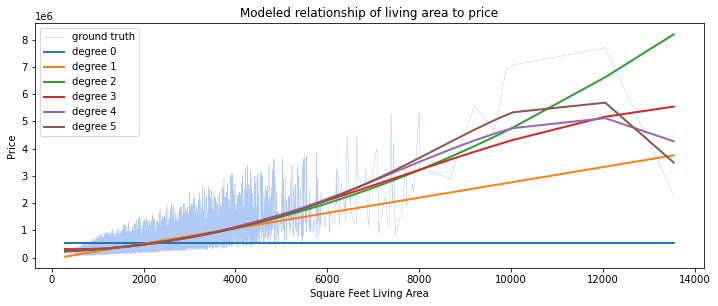

In [6]:
# Ground truth first
fig, ax = plt.subplots(figsize=(12,4.5))
ax.plot(sqft.sqft_living, sqft.price, 
         color='cornflowerblue', 
         linewidth=0.5, alpha=0.5,
         label="ground truth")
#ax.set_xscale('log')
ax.set_xlabel("Square Feet Living Area")
ax.set_ylabel("Price")
ax.set_title("Modeled relationship of living area to price")

for degree in range(6):
    X = PolynomialFeatures(degree).fit_transform(sqft[['sqft_living']])
    model = LinearRegression()
    model.fit(X, sqft.price)
    y_predict = model.predict(X)
    ax.plot(sqft.sqft_living, y_predict, linewidth=2, label=f"degree {degree}")
    
ax.legend(loc='upper left');

## High dimensional linear regression

When we move to more dimensions, and using more features, we usually get more predictive power.

In [9]:
X = df.drop(columns=['id', 'zipcode', 'date',         # Clearly non-numeric
                     'lat', 'long', 'yr_renovated',   # Lat/lon "random"; yr_renovated often zero
                     'sqft_living15', 'sqft_lot15',   # Not clear distinction from base features
                     'price'])                        # Price HAS TO be excluded as target
y = df.price
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.6521982354146699

Including feature combinations is equivalent to fiting a high-dimensional polynomial.  This can often improve prediction further.

In [8]:
X_poly = PolynomialFeatures(3).fit_transform(X)
model = LinearRegression().fit(X_poly, y)
model.score(X_poly, y)

0.7464454507331919

## Exercise

* Determine the model score for polynomial fits using only the top feature (including the linear fit).
* Determine the model score for polynomials using the top two or three features.